# Aufgabe - Größennormierung

Schreiben Sie eine Funktion, die eine beliebige Skalierung von Bildern durchführt.
Implementieren Sie hierzu das Verfahren aus der Vorlesung an der mit `#TODO` gekennzeichneten Codestelle.
Verwenden Sie nicht die Skalierfunktion aus OpenCV.

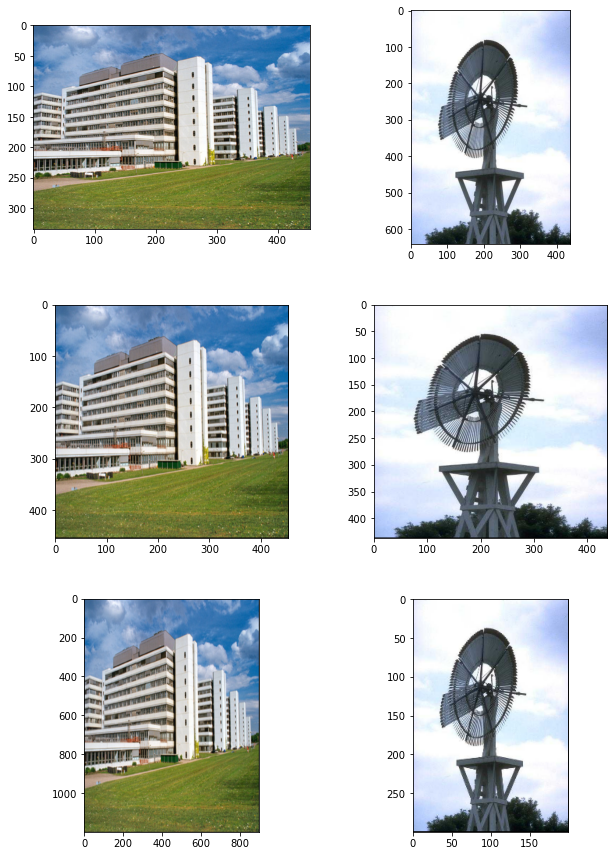

In [2]:
import os

import cv2 as cv
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

def scale(img, height, width):
    # Hinweis: Der Typ der Bilder wird hier geändert um Overflows zu vermeiden (siehe Beispiele)
    img = img.astype(np.float)
    result = np.zeros((height,width,3), np.float)
    #get parameters
    M_old = img.shape[0]
    N_old = img.shape[1]
    M_new = result.shape[0]
    N_new = result.shape[1]
    #iterate over all pixels
    for j_new in range(M_new - 1):
        for k_new in range(N_new - 1):
            for channel in range(len(result[j_new,k_new])):
                #project new pixel onto the old image
                j = j_new*np.divide(M_old - 1,M_new - 1)
                k = k_new*np.divide(N_old - 1,N_new - 1)
                #bilinear interpolation
                jFloorDiff = (j - np.floor(j))
                kFloorDIff = (k - np.floor(k))
                jkfloored = getOldValue(img, j, k, channel)
                fh1 = jkfloored + (getOldValue(img, j + 1, k, channel) - jkfloored) * jFloorDiff
                jkAdd1floored = getOldValue(img, j, k + 1, channel)
                fh2 = jkAdd1floored + (getOldValue(img, j + 1, k + 1, channel) - jkAdd1floored) * jFloorDiff
                result[j_new,k_new,channel] = fh1 + (fh2 - fh1) * kFloorDIff
    return result.astype(np.uint8)

def getOldValue(img, j, k, channel):
    return img[int(np.floor(j)), int(np.floor(k)),channel]
                                 
dir_resources = '../resources'
img_uniansicht = cv.imread(os.path.join(dir_resources, 'Uniansicht.jpg'), cv.IMREAD_COLOR)
img_windrad = cv.imread(os.path.join(dir_resources, 'Windrad.jpg'), cv.IMREAD_COLOR)

fig, axs = plt.subplots(3, 2, figsize = (9, 12))
fig.tight_layout(h_pad=4)
_ = axs[0, 0].imshow(cv.cvtColor(img_uniansicht, cv.COLOR_BGR2RGB))
_ = axs[0, 1].imshow(cv.cvtColor(img_windrad, cv.COLOR_BGR2RGB))
_ = axs[1, 0].imshow(cv.cvtColor(scale(img_uniansicht, 454, 454), cv.COLOR_BGR2RGB))
_ = axs[1, 1].imshow(cv.cvtColor(scale(img_windrad, 437, 437), cv.COLOR_BGR2RGB))
_ = axs[2, 0].imshow(cv.cvtColor(scale(img_uniansicht, 1200, 900), cv.COLOR_BGR2RGB))
_ = axs[2, 1].imshow(cv.cvtColor(scale(img_windrad, 300, 200), cv.COLOR_BGR2RGB))

#### Hinweise

* Beachten Sie dass matplotlib die Bilder für die Darstellung ebenfalls skaliert. Dementsprechend fallan Änderungen der Skalierungen hier nur ins Auge, wenn sich das Seitenverhältnis ändert. Ansonsten werden die Änderungen auch durch die Beschriftung der Achsen verdeutlicht.